In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def read_data(file_path):    #reads the data and plots it
    df=pd.read_excel(file_path,sheet_name=0)
    plt.figure(figsize=(4, 3))
    plt.scatter(df['Time (s)'],df['Peak-Frequency'],s=1)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title("Frequency vs. Time")
    plt.show()
    return df

In [ ]:
def clear_noise(lower_thresh,upper_thresh,df): #takes upper and lower threshold values from user and removes noise.
    df=df[((df['Peak-Frequency']>lower_thresh) & (df['Peak-Frequency']<upper_thresh))]
    df.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(4, 3))
    plt.scatter(df['Time (s)'],df['Peak-Frequency'],s=1)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title("Frequency vs. Time")
    plt.show()
    return df

In [ ]:
def scale_harmonics(df,e): #scales down the 3rd and 5th harmonics down to the 1st harmonic and removes noise in between.
    min_index=(df[df['Peak-Frequency']==df.iloc[:,1].min()].index).min()
    i=min_index
    d=df.iloc[i,1]
    rows_to_drop=[]

    while i<df.shape[0]-1 :
        if np.abs(df.iloc[i+1,1]-d) <= e:
            d=df.iloc[i+1,1]
        elif np.abs(df.iloc[i+1,1]-3*d) <= e :
            df.iloc[i+1,1]=df.iloc[i+1,1]/3
            d=df.iloc[i+1,1]
        elif np.abs(df.iloc[i+1,1]-5*d) <= e :
            df.iloc[i+1,1]=df.iloc[i+1,1]/5
            d=df.iloc[i+1,1]
        else:
            rows_to_drop.append(i + 1)
        i=i+1
    i=min_index
    d=df.iloc[i,1]
    while i>0:
        if np.abs(df.iloc[i-1,1]-d)<=e:
            d=df.iloc[i-1,1]
        elif np.abs(df.iloc[i-1,1]-3*d) <= e :
            df.iloc[i-1,1]=df.iloc[i-1,1]/3
            d=df.iloc[i-1,1]
        elif np.abs(df.iloc[i-1,1]-5*d) <= e :
            df.iloc[i-1,1]=df.iloc[i-1,1]/5
            d=df.iloc[i-1,1]
        else:
            rows_to_drop.append(i - 1)
        i=i-1
    df = df.drop(index=rows_to_drop).reset_index(drop=True)
    plt.figure(figsize=(4, 3))
    plt.scatter(df['Time (s)'],df['Peak-Frequency'],s=1)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title("Scaled and Filtered Frequency vs. Time")
    plt.show()
    return df

In [ ]:
def inv_f_vs_t(df):
    """
    Calculate the inverse of 'Peak-Frequency', plot it against time,
    and return a new DataFrame with time and inverse frequency.

    Parameters:
    df (pd.DataFrame): Input DataFrame with columns 'Time (s)' and 'Peak-Frequency'.

    Returns:
    pd.DataFrame: A new DataFrame with columns 'Time (s)' and 'Inverse Frequency'.
    """
    # Calculate inverse of frequency
    inv_f = 1.0 / df['Peak-Frequency']

    # Create a new DataFrame
    inv_df = pd.DataFrame({
        'Time (s)': df['Time (s)'],
        'Inverse Frequency': inv_f
    })

    # Plot the data
    plt.figure(figsize=(4, 3))
    plt.scatter(inv_df['Time (s)'], inv_df['Inverse Frequency'], s=1)
    plt.xlabel("Time")
    plt.ylabel("1/f (Inverse Frequency)")
    plt.title("1/f vs. Time")
    plt.show()

    return inv_df


In [ ]:
def segment_and_average_with_slope(df, num_segments):
    """
    Divide time into equal-length segments, compute mean time, mean inverse frequency,
    and slope at each mean time. Return a new DataFrame and plot the results.

    Parameters:
    df (pd.DataFrame): The input DataFrame with columns 'Time (s)' and 'Inverse Frequency'.
    num_segments (int): The number of segments to divide the time range into.

    Returns:
    pd.DataFrame: A new DataFrame with columns 'Mean Time (s)', 'Mean Inv Frequency', and 'Slope'.
    """
    # Calculate the segment length
    time_min = df['Time (s)'].min()
    time_max = df['Time (s)'].max()
    dt = (time_max - time_min) / num_segments

    # Initialize list to store results
    segment_means = []

    # Loop through each segment
    for i in range(num_segments):
        segment_start = time_min + i * dt
        segment_end = segment_start + dt

        # Filter data within the current segment
        segment_data = df[(df['Time (s)'] >= segment_start) & (df['Time (s)'] < segment_end)]

        # Calculate mean time and mean inverse frequency for the segment
        if not segment_data.empty:
            mean_time = segment_data['Time (s)'].mean()
            mean_inv_frequency = segment_data['Inverse Frequency'].mean()
            segment_means.append({'Mean Time (s)': mean_time, 'Mean Inv Frequency': mean_inv_frequency})

    # Convert results into a new DataFrame
    result_df = pd.DataFrame(segment_means)

    # Calculate slopes (differences between consecutive points)
    result_df['Slope'] = result_df['Mean Inv Frequency'].diff() / result_df['Mean Time (s)'].diff()

    # Plot mean time vs mean inverse frequency
    plt.figure(figsize=(4, 3))
    plt.plot(result_df['Mean Time (s)'], result_df['Mean Inv Frequency'], marker='o', color='b', label='Mean Inv Frequency')
    plt.xlabel('Mean Time (s)')
    plt.ylabel('Mean Inv Frequency')
    plt.title('Mean Time vs Mean Inv Frequency')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot mean time vs slope
    plt.figure(figsize=(4, 3))
    plt.plot(result_df['Mean Time (s)'], result_df['Slope'], marker='o', color='r', label='Slope')
    plt.xlabel('Mean Time (s)')
    plt.ylabel('Slope')
    plt.title('Mean Time vs Slope')
    plt.grid(True)
    plt.legend()
    plt.show()

    return


# Data 1


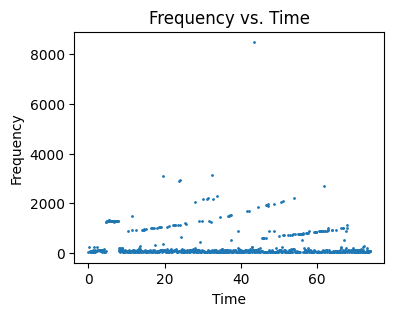

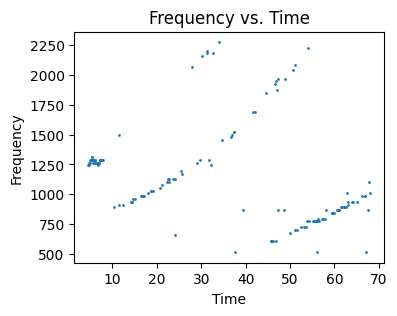

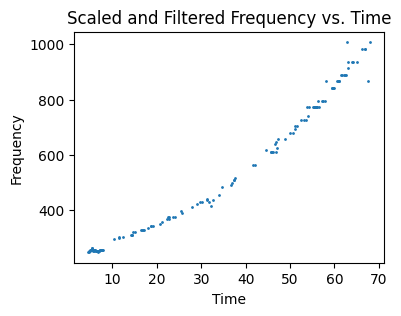

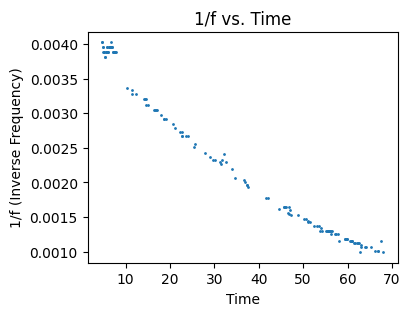

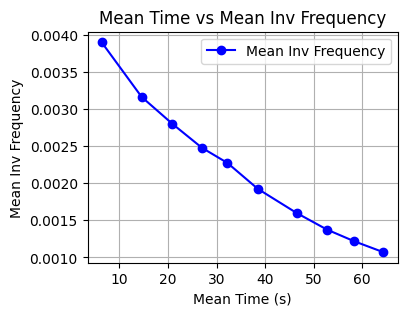

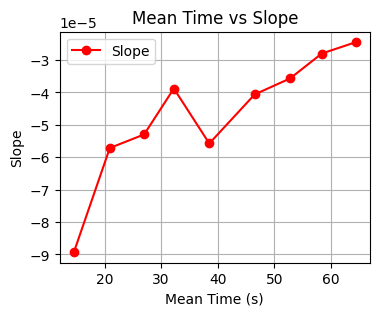

In [ ]:
df1=read_data('data_1.xlsx')
df1=clear_noise(500,2500,df1)
df1=scale_harmonics(df1,200)
inv_df1=inv_f_vs_t(df1)
segment_and_average_with_slope(inv_df1, 10)

# Data 2

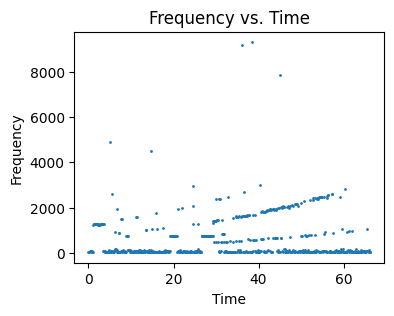

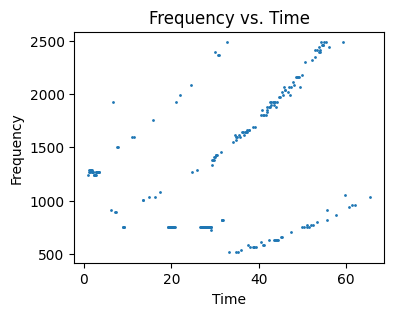

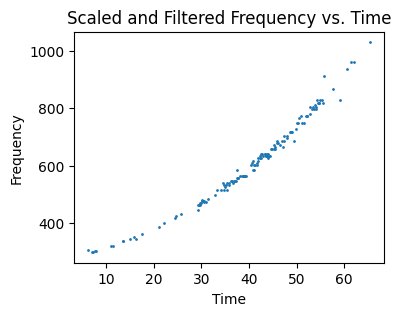

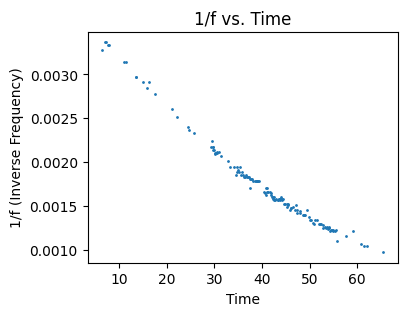

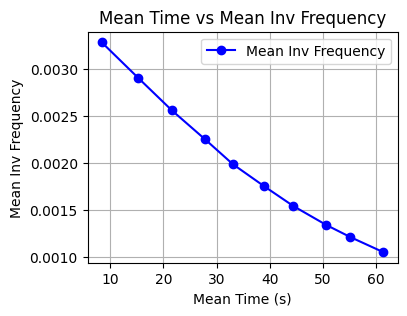

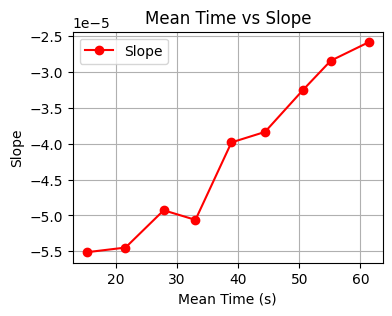

In [ ]:
df=read_data('data_2.xlsx')
df=clear_noise(500,2500,df)
df=scale_harmonics(df,200)
inv_df=inv_f_vs_t(df)
segment_and_average_with_slope(inv_df, 10)

# Data 3

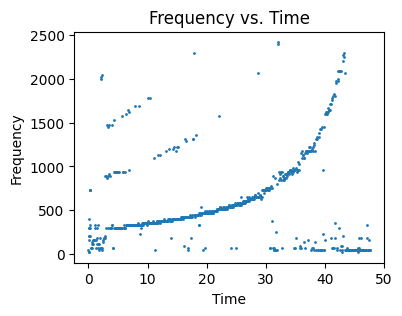

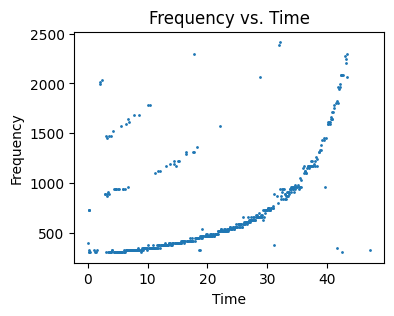

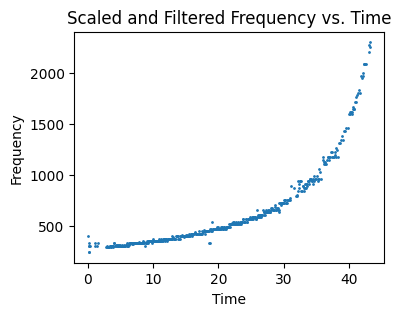

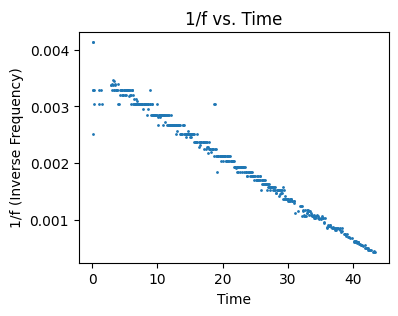

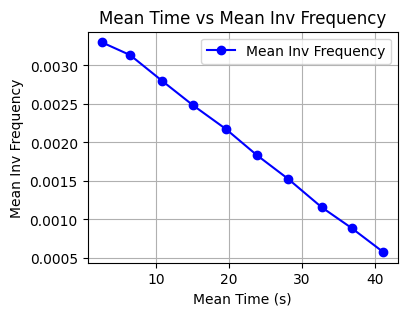

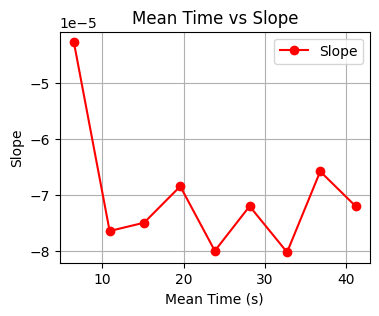

In [ ]:
df=read_data('data_3.xlsx')
df=clear_noise(300,2500,df)
df=scale_harmonics(df,200)
inv_df=inv_f_vs_t(df)
segment_and_average_with_slope(inv_df, 10)

# Data 4

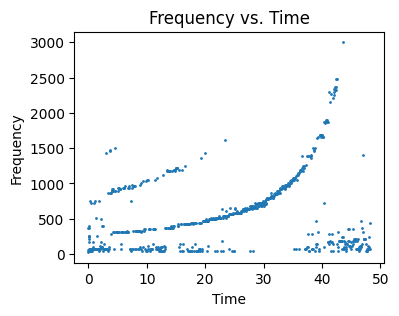

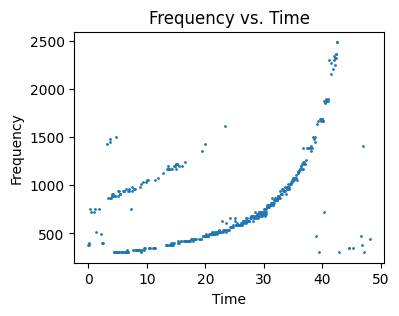

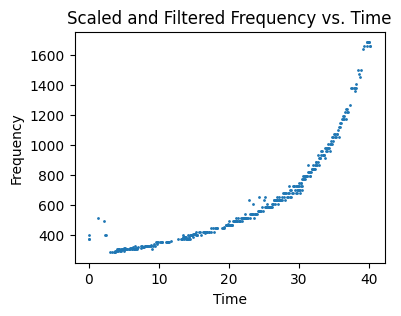

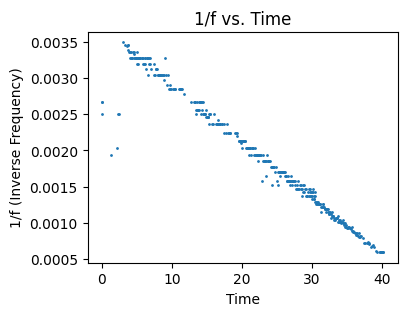

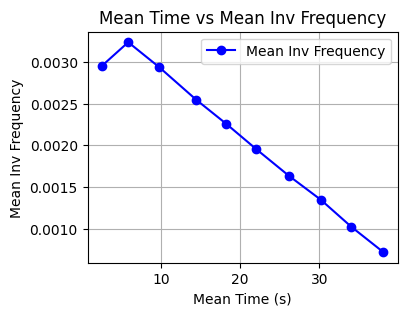

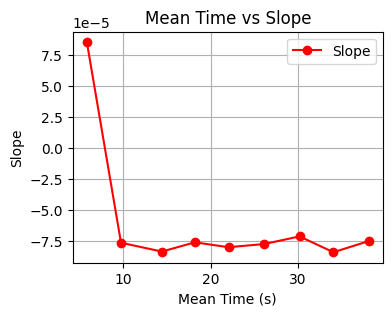

In [ ]:
df=read_data('data_4.xlsx')
df=clear_noise(300,2500,df)
df=scale_harmonics(df,150)
inv_df=inv_f_vs_t(df)
segment_and_average_with_slope(inv_df, 10)

# Data 5

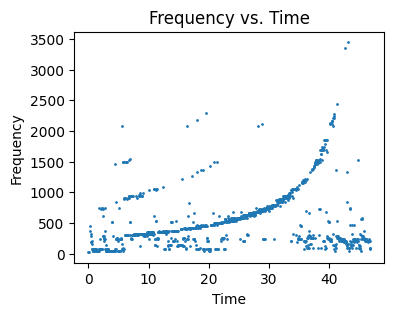

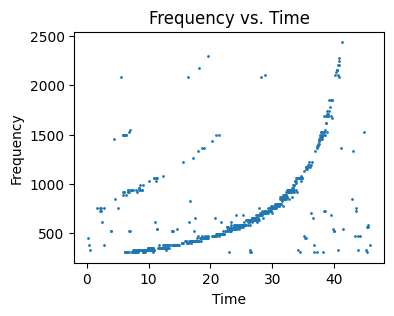

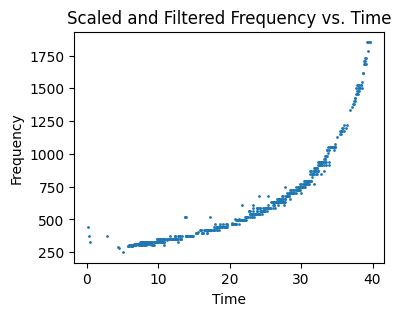

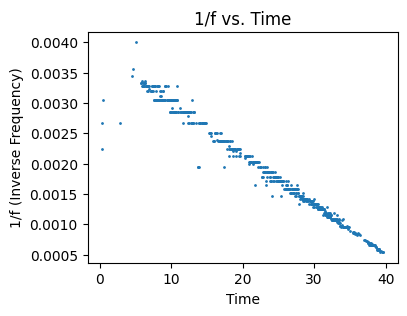

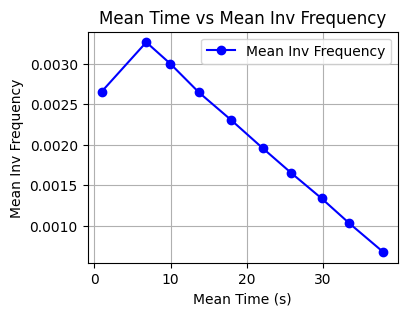

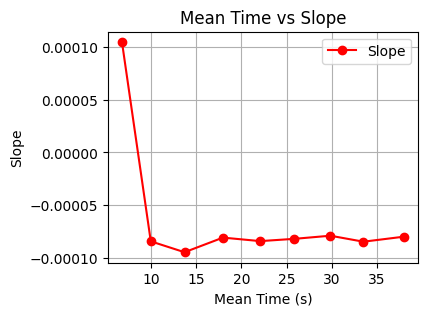

In [ ]:
df=read_data('data_5.xlsx')
df=clear_noise(300,2500,df)
df=scale_harmonics(df,150)
inv_df=inv_f_vs_t(df)
segment_and_average_with_slope(inv_df, 10)

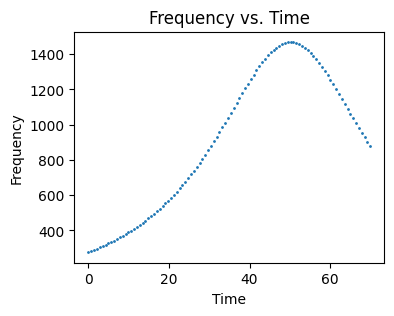

In [ ]:
c=340
d_1=0.0015
d_2=0.02
d=0.025
h=0.39
L=0.3
g=9.8
k=((2*g)/(1-(d_1/d_2)**4))**0.5
x=np.linspace(0,70,100)
y=((-4/c)*((d_1/d)**2)*((k*(h**0.5)*x)-((k**2/4)*(d_1**2/d_2**2)*x**2)))+((4/c)*(L+0.3*d))
plt.figure(figsize=(4, 3))
plt.scatter(x,1/y,s=1)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Frequency vs. Time")
plt.show()